## Title: Download and Save Chicago Crime and Police Boundaries Data

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath("../../src/"))
from gather_data.chicago import download_chicago_crime_data, download_police_boundaries

PATH_Chicago_data = "../../../uncertainty-informed-data/real_data/Chicago/"

## 📥 1. Download crime data

In [2]:
## 2024 year
df_crimes_2024 = download_chicago_crime_data(year = 2024,
                                             output_dir = PATH_Chicago_data,
                                             filename = "crimes_2024.csv",
                                             save_to_csv = True)
df_crimes_2024.head()

🔎 Found 258403 records for year 2024.
📦 Downloading in chunks of 100000 rows...
⬇️ Downloading from offset 0...
⬇️ Downloading from offset 100000...
⬇️ Downloading from offset 200000...
✅ Data saved to: ../../../uncertainty-informed-data/real_data/Chicago/crimes_2024.csv (258403 rows)


,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,13364090,JH146864,2024-02-10T00:44:00.000,002XX W 47TH ST,0484,BATTERY,"PROTECTED EMPLOYEE - HANDS, FISTS, FEET, NO / ...",CTA PLATFORM,True,False,...,20,37,08B,1175476,1873816,2024,2025-05-17T15:40:52.000,41.809125265,-87.631906508,"{'latitude': '41.809125265', 'longitude': '-87..."
1,13376308,JH161184,2024-02-22T00:49:00.000,044XX S KEDZIE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SIDEWALK,True,False,...,12,58,08B,1155768,1875006,2024,2025-05-17T15:40:52.000,41.812809432,-87.704160069,"{'latitude': '41.812809432', 'longitude': '-87..."
2,13424244,JH219128,2024-04-09T21:54:00.000,064XX S CLAREMONT AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,SIDEWALK,True,False,...,16,66,15,1161848,1861912,2024,2025-05-17T15:40:52.000,41.776753488,-87.682222167,"{'latitude': '41.776753488', 'longitude': '-87..."
3,13335170,JH111953,2024-01-11T08:00:00.000,003XX N MENARD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,29,25,14,1137653,1901617,2024,2024-12-21T15:40:46.000,41.886178676,-87.769967028,"{'latitude': '41.886178676', 'longitude': '-87..."
4,13373974,JH158444,2024-02-18T02:00:00.000,078XX S EBERHART AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,True,True,...,6,69,02,1180935,1853046,2024,2024-12-22T15:41:04.000,41.752006389,-87.612522704,"{'latitude': '41.752006389', 'longitude': '-87..."


In [3]:
def analyze_crime_data(df: pd.DataFrame, name="Crime Dataset"):
    print(f"📋 Analysis of {name}")
    print("=" * 60)
    print(f"🔢 Total records: {len(df)}")
    print(f"🔢 Columns: {df.shape[1]}")
    print()

    # Columnas clave
    key_cols = ["primary_type", "year", "location_description", "arrest", "domestic", "district"]

    # Columnas vacías
    print("🧩 Missing values:")
    for col in key_cols:
        if col in df.columns:
            missing = df[col].isnull().sum()
            if missing > 0:
                print(f"• {col}: {missing} missing values")

    print("\n🔝 Most common crime types:")
    if "primary_type" in df.columns:
        print(df["primary_type"].value_counts().head(10))

    print("\n🏠 Most common locations:")
    if "location_description" in df.columns:
        print(df["location_description"].value_counts().head(5))

    print("\n🚨 Arrest rate:")
    if "arrest" in df.columns:
        arrest_rate = df["arrest"].mean()
        print(f"• Arrests in {arrest_rate:.2%} of cases")

    print("\n🏠 Domestic incidents:")
    if "domestic" in df.columns:
        domestic_rate = df["domestic"].mean()
        print(f"• Domestic-related: {domestic_rate:.2%}")

    print("\n📆 Crimes per year:")
    if "year" in df.columns:
        print(df["year"].value_counts().sort_index(ascending=False).head(5))

    print("\n📍 Top districts (if available):")
    if "district" in df.columns:
        print(df["district"].value_counts().head(5))

analyze_crime_data(df_crimes_2024, name="Chicago Crimes 2024")



📋 Analysis of Chicago Crimes 2024
🔢 Total records: 258403
🔢 Columns: 22

🧩 Missing values:
• location_description: 1053 missing values

🔝 Most common crime types:
primary_type
THEFT                  60471
BATTERY                46102
CRIMINAL DAMAGE        28549
ASSAULT                23462
MOTOR VEHICLE THEFT    21701
OTHER OFFENSE          17072
DECEPTIVE PRACTICE     15922
ROBBERY                 9119
BURGLARY                8424
WEAPONS VIOLATION       7839
Name: count, dtype: int64

🏠 Most common locations:
location_description
STREET                69587
APARTMENT             49289
RESIDENCE             30883
SIDEWALK              13808
SMALL RETAIL STORE     9773
Name: count, dtype: int64

🚨 Arrest rate:
• Arrests in 13.75% of cases

🏠 Domestic incidents:
• Domestic-related: 18.38%

📆 Crimes per year:
year
2024    258403
Name: count, dtype: int64

📍 Top districts (if available):
district
008    17235
012    16156
001    14868
006    14827
019    14081
Name: count, dtype: int64


## 🗺 2. Download boundaries (districts and beats)

In [6]:
# Download both police districts and beats
gdfs = download_police_boundaries(which="both", output_dir=PATH_Chicago_data)



⬇️ Downloading police districts GeoJSON...
✅ Districts saved to: ../../../uncertainty-informed-data/real_data/Chicago/police_districts.geojson
📍 Districts loaded: 25 records
⬇️ Downloading police beats GeoJSON...
✅ Beats saved to: ../../../uncertainty-informed-data/real_data/Chicago/police_beats.geojson
📍 Beats loaded: 277 records


In [7]:
print("districts")
display(gdfs["districts"].crs)
print("*"*20)
print("beats")
display(gdfs["beats"].crs)

districts


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

********************
beats


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

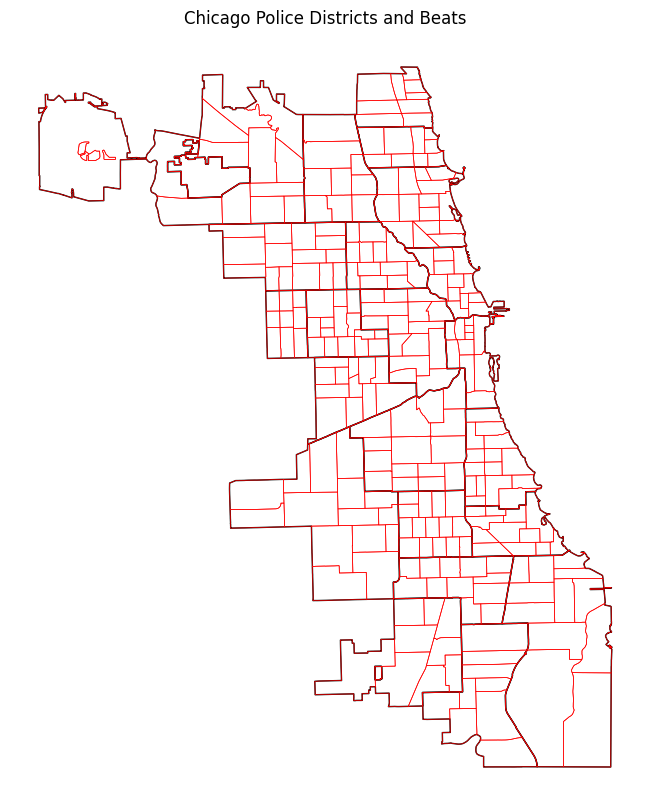

In [8]:
# Plot police beats over districts
fig, ax = plt.subplots(figsize=(10, 10))
gdfs["districts"].plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1)
gdfs["beats"].plot(ax=ax, facecolor="none", edgecolor="red", linewidth=0.5)
plt.title("Chicago Police Districts and Beats")
plt.axis("off")
plt.show()

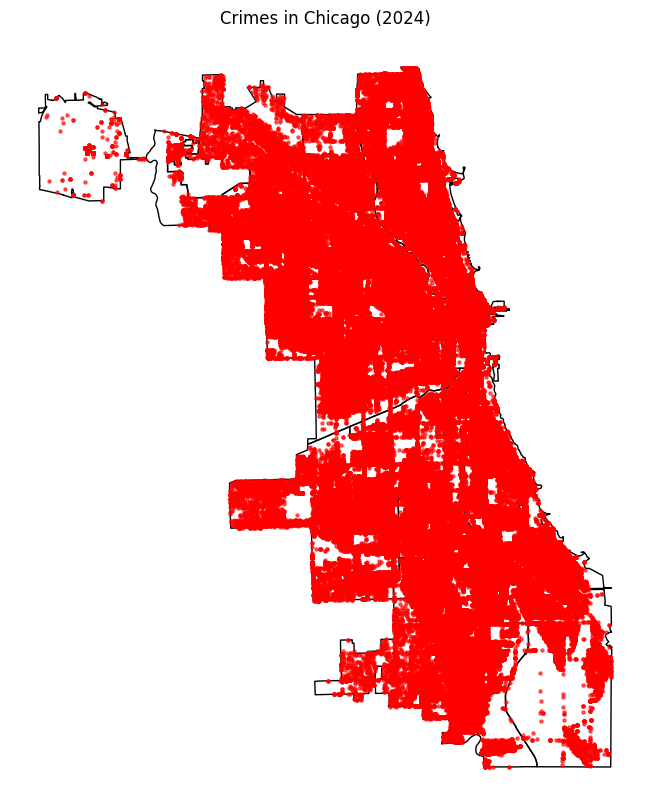

In [10]:
import geopandas as gpd
from shapely.geometry import Point

# Convert to GeoDataFrame
gdf_homicides = gpd.GeoDataFrame(
    df_crimes_2024,
    geometry=[Point(xy) for xy in zip(df_crimes_2024.longitude, df_crimes_2024.latitude)],
    crs="EPSG:4326"
)

# Plot over districts
fig, ax = plt.subplots(figsize=(10, 10))
gdfs["districts"].plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1)
gdf_homicides.plot(ax=ax, markersize=5, color="red", alpha=0.6)
plt.title("Crimes in Chicago (2024)")
plt.axis("off")
plt.show()